# SBB

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import numpy as np

## Import Data

In [101]:
df = pd.read_csv('data/zugzahlen.csv')

In [102]:
df.head(5)

,PID,ISB,Strecke_Nummer,Strecke_Bezeichnung,Strecke_Art,BP_Von_Abschnitt,BP_Von_Abschnitt_Bezeichnung,BP_Bis_Abschnitt,BP_Bis_Abschnitt_Bezeichnung,Anzahl_Zuege,BPUIC,KOORDZ,KOORDY,KOORDX,Name Haltestelle,TU Nummer,Bedienpunkt Cargo,land,geopos_von,geopos_bis
0,SBB_GESE_CHY,SBB,1,Genève Aéroport - Lausanne,STRECKE,GESE,Genève-Sécheron,CHY,Chambésy,126307,8516283,390.4,500153.08,119825.45,Genève-Sécheron,11,None,Switzerland,"6.14454714955, 46.2224480511","6.14732717469, 46.2423883571"
1,SBB_MIES_TAN,SBB,1,Genève Aéroport - Lausanne,STRECKE,MIES,Mies,TAN,Tannay,126101,8501014,394.7,502222.94,128400.90,Mies,11,None,Switzerland,"6.16956925257, 46.2998837999","6.18111951391, 46.3076442488"
2,SBB_MOR_STJ,SBB,1,Genève Aéroport - Lausanne,STRECKE,MOR,Morges,STJ,Morges-St-Jean,121566,8501037,381.2,527498.18,151525.28,Morges,11,*,Switzerland,"6.49396657295, 46.5110943408","6.5080466068, 46.5181943179"
3,SBB_TUI_GDBE,SBB,1,Genève Aéroport - Lausanne,STRECKE,TUI,Les Tuileries,GDBE,Genthod-Bellevue,126311,8501011,389.2,500417.99,122879.65,Les Tuileries,11,None,Switzerland,"6.14732757249, 46.2499580317","6.15395779335, 46.2567477219"
4,SBB_RUS_SY,SBB,3,La Plaine Frontière - Genève,STRECKE,RUS,Russin,SY,Satigny,40988,8501002,377.9,490285.68,116142.90,Russin,11,None,Switzerland,"6.01754977864, 46.1877882306","6.03749960767, 46.2142381831"


In [103]:
df['lon_von'] = df.geopos_von.str.split('\,').str[0]
df['lon_von'] = df['lon_von'].map(float)

In [104]:
df['lat_von'] = df.geopos_von.str.split('\,').str[1]
df['lat_von'] = df['lat_von'].map(float)

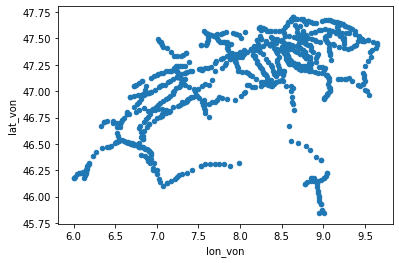

In [105]:
df.plot.scatter(x='lon_von', y ='lat_von');

In [106]:
df['lon_bis'] = df.geopos_bis.str.split('\,').str[0]
df['lon_bis'] = df['lon_bis'].map(float)

In [107]:
df['lat_bis'] = df.geopos_bis.str.split('\,').str[1]
df['lat_bis'] = df['lat_bis'].map(float)

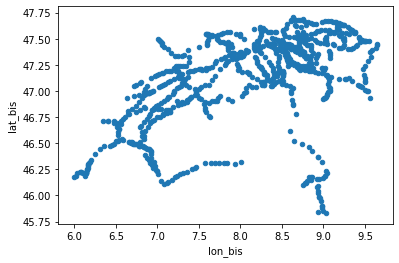

In [108]:
df.plot.scatter(x='lon_bis', y ='lat_bis');

In [113]:
pos_von = {}
for i in range(0, len(df)):
    pos_von[df.BP_Von_Abschnitt[i]] = (df.lat_von[i], df.lon_von[i])

In [114]:
pos_von

{'GESE': (46.2224480511, 6.14454714955),
 'MIES': (46.2998837999, 6.16956925257),
 'MOR': (46.5110943408, 6.49396657295),
 'TUI': (46.2499580317, 6.14732757249),
 'RUS': (46.1877882306, 6.01754977864),
 'ZIM': (46.2212782881, 6.06572961816),
 'CL': (46.4427363866, 6.89577416732),
 'MX': (46.4358764283, 6.91043416362),
 'RIV': (46.4741959259, 6.78458512784),
 'STSA': (46.4725859812, 6.79702513762),
 'TER': (46.4263764483, 6.92269446132),
 'BDR': (46.9594460636, 6.83505431971),
 'CC': (46.8508755224, 6.72317472087),
 'GRS': (46.8062746752, 6.64194298034),
 'TWN': (47.0936548007, 7.15649883305),
 'BELL': (47.2088961768, 7.50786664414),
 'PIE': (47.1714251426, 7.34019644684),
 'SW': (47.2067062508, 7.53194669287),
 'EG': (47.3148570917, 7.79895396666),
 'NB': (47.2703871142, 7.69481442016),
 'WAA': (47.231947095, 7.65622530299),
 'BRT': (46.7150539002, 6.47473518659),
 'CR': (46.6967041225, 6.47812521581),
 'TR': (46.9424063665, 6.6765762976),
 'CHN': (46.9671059769, 6.81226410919),
 'LOC'

In [115]:
pos_bis = {}
for i in range(0, len(df)):
    pos_bis[df.BP_Bis_Abschnitt[i]] = (df.lat_bis[i], df.lon_bis[i])

In [116]:
pos_bis

{'CHY': (46.2423883571, 6.14732717469),
 'TAN': (46.3076442488, 6.18111951391),
 'STJ': (46.5181943179, 6.5080466068),
 'GDBE': (46.2567477219, 6.15395779335),
 'SY': (46.2142381831, 6.03749960767),
 'VM': (46.2223483406, 6.07690984868),
 'MX': (46.4358764283, 6.91043416362),
 'TER': (46.4263764483, 6.92269446132),
 'STSA': (46.4725859812, 6.79702513762),
 'VV': (46.4629962321, 6.84344455538),
 'VEY': (46.4176161625, 6.92785479694),
 'CLB': (46.9676359617, 6.84888396056),
 'LLA': (46.8595357903, 6.74136494021),
 'ONB': (46.8325152002, 6.68993413176),
 'TUE': (47.1149947654, 7.1973078466),
 'BELE': (47.2085261387, 7.49534638898),
 'BIBD': (47.1583849693, 7.29459729258),
 'SOAD': (47.2088661856, 7.52143688631),
 'HRK': (47.3216070118, 7.81845403287),
 'OEN': (47.2850170066, 7.70985453082),
 'NB': (47.2703871142, 7.69481442016),
 'CR': (46.6967041225, 6.47812521581),
 'AX': (46.6980742045, 6.51890509252),
 'CVT': (46.9303761939, 6.63403500081),
 'CP': (46.9833458596, 6.88381357009),
 'CRE

In [125]:
pos = {**pos_bis, **pos_von}

In [126]:
len(pos)

1002

## Building the Network

In [127]:
D = nx.from_pandas_edgelist(df, source = 'BP_Von_Abschnitt', target = 'BP_Bis_Abschnitt', edge_attr = 'Anzahl_Zuege', create_using = nx.DiGraph())

In [128]:
len(D.nodes())

1002

In [129]:
len(D.edges())

848

In [130]:
D.edges(data=True)

OutEdgeDataView([('GESE', 'CHY', {'Anzahl_Zuege': 126307}), ('GESE', 'GEVO', {'Anzahl_Zuege': 8465}), ('CHY', 'VEN', {'Anzahl_Zuege': 126310}), ('MIES', 'TAN', {'Anzahl_Zuege': 126101}), ('TAN', 'COP', {'Anzahl_Zuege': 126100}), ('MOR', 'STJ', {'Anzahl_Zuege': 121566}), ('STJ', 'LON', {'Anzahl_Zuege': 121566}), ('TUI', 'GDBE', {'Anzahl_Zuege': 126311}), ('GDBE', 'CRGD', {'Anzahl_Zuege': 126311}), ('RUS', 'SY', {'Anzahl_Zuege': 40988}), ('SY', 'ZIM', {'Anzahl_Zuege': 40988}), ('ZIM', 'VM', {'Anzahl_Zuege': 40990}), ('VM', 'VMC', {'Anzahl_Zuege': 40990}), ('CL', 'MX', {'Anzahl_Zuege': 56090}), ('MX', 'TER', {'Anzahl_Zuege': 60062}), ('MX', 'VERX', {'Anzahl_Zuege': 3732}), ('TER', 'VEY', {'Anzahl_Zuege': 60066}), ('RIV', 'STSA', {'Anzahl_Zuege': 82741}), ('RIV', 'GRIL', {'Anzahl_Zuege': 5119}), ('STSA', 'VV', {'Anzahl_Zuege': 82745}), ('VV', 'TOUR', {'Anzahl_Zuege': 59839}), ('VEY', 'VIL', {'Anzahl_Zuege': 60062}), ('BDR', 'CLB', {'Anzahl_Zuege': 43879}), ('CLB', 'AUV', {'Anzahl_Zuege': 4

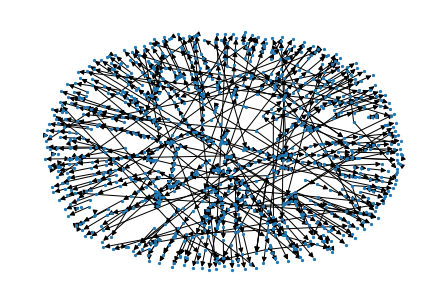

In [131]:
nx.draw(D, with_labels=False, node_size=5)

In [132]:
G = nx.Graph(D)

In [133]:
len(G.nodes())

1002

In [134]:
len(G.edges())

848

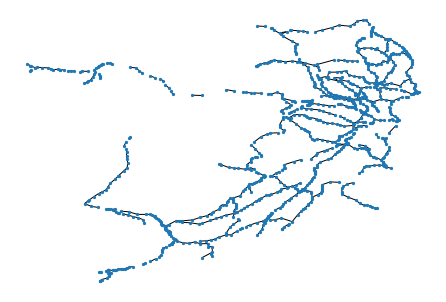

In [135]:
nx.draw(G, pos=pos, with_labels=False, node_size=5)